In [1]:
# Import Libaries
import pandas as pd 
import numpy as np 
import math, os
from tqdm import trange
from PIL import Image
import csv
import statistics

from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
os.getcwd()

'E:\\Machine Learning\\Kaggle - Open Images Challenge'

In [3]:
# Import annotation data without label covered by COCO
os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge")
df = pd.read_csv("train_annotation_without_coco.csv")

In [4]:
# View snapshot of the data
df.head()

,ImageID,LabelName,XMin,XMax,YMin,YMax
0,8d6dec80235b6fea,/m/09j5n,0.760000,0.778125,0.645892,0.673277
1,8d6dec80235b6fea,/m/09j5n,0.817500,0.831875,0.628895,0.661945
2,8d6dec80235b6fea,/m/09j5n,0.843125,0.870000,0.619452,0.645892
3,8d6dec80235b6fea,/m/09j5n,0.867500,0.891875,0.597734,0.625118
4,8d6dec80235b6fea,/m/09j5n,0.895625,0.911250,0.625118,0.656280


In [5]:
# A bit more info on the data..
label_counts_index= df['LabelName'].value_counts().index.tolist()
label_counts_values= list(df['LabelName'].value_counts())
print("Total label counts : ",sum(label_counts_values))
print("Media of labels : ",int(sum(label_counts_values)/len(label_counts_values)))
print("Unique Label names count : ",len(set(df['LabelName'])))

Total label counts :  10114966
Media of labels :  23969
Unique Label names count :  422


In [6]:
# Visualize object counts
mapping_file = pd.read_csv("excel files/challenge-2018-class-descriptions-500.csv")
mapping_file_dict = dict()
for i in range(len(mapping_file)):
    mapping_file_dict[mapping_file['kaggle_label'][i]] = mapping_file['name'][i]
for i in range(len(label_counts_index)):
    print(mapping_file_dict[label_counts_index[i]]," : ",label_counts_values[i])

Man  :  1418594
Tree  :  1051344
Human face  :  1037710
Woman  :  767337
Footwear  :  744474
Window  :  503467
Flower  :  345296
Wheel  :  340639
Human hair  :  234057
Human arm  :  208982
Human head  :  201633
Girl  :  197155
Building  :  178634
House  :  136152
Tire  :  122615
Suit  :  110848
Boy  :  87555
Table  :  85691
Skyscraper  :  81261
Land vehicle  :  81108
Jeans  :  78473
Human eye  :  77233
Human hand  :  75307
Human leg  :  71479
Toy  :  70963
Tower  :  67945
Human nose  :  60142
Bicycle wheel  :  59521
Glasses  :  57946
Dress  :  52999
Vehicle  :  50959
Palm tree  :  42026
Tableware  :  41086
Drink  :  40323
Furniture  :  38527
Sculpture  :  34533
Flag  :  29246
Dessert  :  27407
Microphone  :  27272
Fruit  :  26236
Jacket  :  25957
Guitar  :  25896
Drum  :  24818
Sunglasses  :  23996
Poster  :  23566
Fish  :  23195
Shelf  :  22899
Flowerpot  :  22760
Sports uniform  :  19396
Door  :  19256
Vegetable  :  18621
Human ear  :  17774
Animal  :  17442
Shorts  :  16981
Musical 

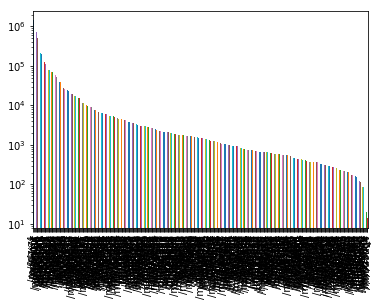

In [7]:
# Visualize data imbalance
df['LabelName'].value_counts().plot(kind='bar',logy=True)

In [13]:
# Turn label names into list
label_names = list(set(df['LabelName']))

In [8]:
# Now fun begins. Below code will truncate labels down, discarding too much info and will
# duplicate same images multiple times in order to balance data to improve training process

# Choose number of counts for each label you wish to throttle down&up to
unique_label_count = 2000
# Define data holders
ImageID = []
LabelName = []
XMin = []
XMax = []
YMin = []
YMax = []

print("We will throttle down or up the occurences of each image to : ",unique_label_count)
print("Balancing number of label inputs will hopefully improve training proces...")
for i in trange(len(label_names)):
    df_holder = df[df['LabelName'] == label_names[i]]
    # If label count is less than unique_label_count, throttle it up by duplicating same images
    if len(df_holder)<=unique_label_count:
        for l in range(int(round(unique_label_count/len(df_holder),0))):
            for k in range(len(df_holder)):
                ImageID.append(df_holder.iloc[k]['ImageID'])
                LabelName.append(df_holder.iloc[k]['LabelName'])
#                 XMin.append(df_holder.iloc[k]['XMin'])
#                 XMax.append(df_holder.iloc[k]['XMax'])
#                 YMin.append(df_holder.iloc[k]['YMin'])
#                 YMax.append(df_holder.iloc[k]['YMax'])
    # If label count is more than unique_label_count, throttle it down by discarding images
    else:     
        for j in range(unique_label_count):
            ImageID.append(df_holder.iloc[j]['ImageID'])
            LabelName.append(df_holder.iloc[j]['LabelName'])
#             XMin.append(df_holder.iloc[j]['XMin'])
#             XMax.append(df_holder.iloc[j]['XMax'])
#             YMin.append(df_holder.iloc[j]['YMin'])
#             YMax.append(df_holder.iloc[j]['YMax'])
final_df = pd.DataFrame({"ImageID":ImageID ,"LabelName":LabelName})
final_df.to_csv("balanced_train_input.csv",index=False)
           


In [19]:
# Import "balanced_train_input.csv"

final_df = pd.read_csv('balanced_train_input.csv',low_memory=False)
LabelName = list(final_df["LabelName"])
ImageID = list(final_df["ImageID"])

In [21]:
# Verify Data

print("After throttling, we now have average count of ",int(len(LabelName)/len(label_names))," label occurences for each of ",len(label_names)," classes.")
print("Since an image can contain multiple label occurences, after the reduction, we now have ",len(set(ImageID))," images to train.") 
occurence_list = []
for i in range(len(label_names)):
    occurence_list.append(LabelName.count(label_names[i]))
print("Minimum occurence count is ",min(occurence_list),", maximum occurence count is ",max(occurence_list)," and average of occurence count is ",int(sum(occurence_list)/len(occurence_list)))

After throttling, we now have average count of  1973  label occurences for each of  422  classes.
Since an image can contain multiple label occurences, after the reduction, we now have  243768  images to train.
Minimum occurence count is  1340 , maximum occurence count is  2574  and average of occurence count is  1973


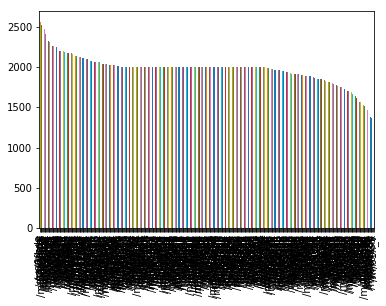

In [12]:
# Check visualization of throttled data
LabelName_as_df = pd.DataFrame({"LabelName":LabelName})
LabelName_as_df['LabelName'].value_counts().plot(x='classes',y='Object Count',kind='bar')

In [ ]:
# Visualize a problem of counting images multiple times that have multiple labels. 

print("We want duplicate images for rare occurence labels, but don't want duplicate images created due to an image having multiple labels!")
print("Below shows how we can an image with multiple images can disrupt attempt to balance label occurences")
final_df[['ImageID','LabelName']].iloc[0:11]

In [ ]:
# To get a true throttled list of Images that contain about the same amount of labels.

# We create new images list by taking out images that has been counted multiple times due to having many labels
final_df_test = final_df
ImageID_adjusted = []
for i in trange(len(final_df_test)-1):
    if(final_df_test['ImageID'][i]!=final_df_test['ImageID'][i+1]):
        ImageID_adjusted.append(final_df_test['ImageID'][i])
# # We can't forget about last row :)
if final_df_test['ImageID'][len(final_df_test['ImageID'])-1]!=final_df_test['ImageID'][i-2]:
    ImageID_adjusted.append(final_df_test['ImageID'][len(final_df_test['ImageID'])-1])

In [ ]:
# Randomize entry orders for even training
import copy
ImageID_adjusted_shuffle = copy.copy(ImageID_adjusted)
np.random.shuffle(ImageID_adjusted_shuffle)

In [340]:
# Create .txt files for Darknet training.
os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge")
with open('train_throttled.txt','w') as f:
    for lines in ImageID_adjusted_shuffle:
        f.write('data/train/')
        f.write(lines)
        f.write('.jpg')
        f.write('\n')

## Create .txt files for images not containing any labels of 422 coco data to be used as negative instance for Darknet training

In [40]:
# load original train annotation csv file for negative instances

negative_df = pd.read_csv('excel files/challenge-2018-train-annotations-bbox.csv',low_memory=False)
labels_df = pd.read_csv('excel files/challenge-2018-class-descriptions-500.csv',low_memory=False)

In [48]:
# Create list of labels covered by coco
coco_labels = []
for i in range(len(labels_df['kaggle_label'])):
    if labels_df['kaggle_label'][i] in label_names:
        pass
    else:
        coco_labels.append(labels_df['kaggle_label'][i])      

In [58]:
# Add ImageID if label name is one of coco
negative_ImageID = []

for i in trange(len(coco_labels)):
    negative_df_holder = negative_df[negative_df['LabelName'] == coco_labels[i]]
    # If label count is less than unique_label_count, throttle it up by duplicating same images
    for j in range(len(negative_df_holder)):
        negative_ImageID.append(negative_df_holder.iloc[j]['ImageID'])


100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [06:50<00:00,  5.27s/it]


In [74]:
# We further make sure negative_ImageID doesn't have ANY of 422 labels.
negative_ImageID_set = list(set(negative_ImageID))
throttled_ImageID_set = list(set(final_df['ImageID']))
print("Number of images with labels covered by COCO are : ",len(negative_ImageID_set))
print("There is a possibility that above images contain some of 422 labels we want for training.")
final_negative_ImageID = list(set(negative_ImageID_set)-set(throttled_ImageID_set))
print("This is final number of images we are sure to not include any label from 422 classes : ",len(final_negative_ImageID))

Number of images with labels covred by COCO are :  590506
There is a possibility that above images contain some of 422 labels we want for training.
This is final number of images we are sure to not include any label from 422 classes :  532141


In [91]:
# Import previously created train_throttled.txt

os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64")
ImageID_adjusted_shuffle = []
with open("train_throttled.txt") as f:
    ImageID_adjusted_shuffle = f.readlines()
for i in range(len(ImageID_adjusted_shuffle)):
    ImageID_adjusted_shuffle[i] = ImageID_adjusted_shuffle[i][11:27]

In [96]:
# Choose negative ImageIDs

print("Darknet recommends to use as many negative images as there are images with objects for training.")
print("Number of images we are using for training including duplicates are ", len(ImageID_adjusted_shuffle))
print("Therefore, we will choose ",len(ImageID_adjusted_shuffle), " of ",len(final_negative_ImageID)," images, or all of them since ",len(ImageID_adjusted_shuffle),">",len(final_negative_ImageID))

Darknet recommends to use as many negative images as there are images with objects for training.
Number of images we are using for training including duplicates are  832754
Therefore, we will choose  832754  of  532141  images, or all of them since  832754 > 532141


In [97]:
# # Trim final_negative_ImageID to be equal to throttled_ImageID_set if len(final_negative_ImageID)>len(throttled_ImageID_set)
# trimmed_final_negative_ImageID = []
# for i in trange(len(set(throttled_ImageID_set))):
#     trimmed_final_negative_ImageID.append(final_negative_ImageID[i])
# len(trimmed_final_negative_ImageID)
    

In [119]:
# Combine training images with negatives images and output to a txt file

ImageID_adjusted_shuffle_with_negatives = []
for i in range(len(ImageID_adjusted_shuffle)):
    ImageID_adjusted_shuffle_with_negatives.append(ImageID_adjusted_shuffle[i])
for i in range(len(final_negative_ImageID)):
    ImageID_adjusted_shuffle_with_negatives.append(final_negative_ImageID[i])
# Randomize entry orders
np.random.shuffle(ImageID_adjusted_shuffle_with_negatives)
# Create final file for shuffled train throttled file with negative images
with open("train_throttled_with_negative.txt",'w') as f:
    for lines in ImageID_adjusted_shuffle_with_negatives:
        f.write('data/train/')
        f.write(lines)
        f.write('.jpg')
        f.write('\n')


In [117]:
# Create blank .txt files for the negative images

os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64/data/train")
for i in trange(len(final_negative_ImageID)):
    with open(final_negative_ImageID[i]+".txt",'w') as f:
        f.write("")



100%|████████████████████████████████████████████████████████████████████████| 532141/532141 [04:07<00:00, 2148.93it/s]


### Load and view train folder's data

In [2]:
# Get all jpg files in train folder
os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64/data/train")
train_names = os.listdir()
train_names_jpg = []
for files in train_names:
    if files.endswith('.jpg'):
        train_names_jpg.append(files)
# Import mapping to display actual object's name
mapping_without_coco = pd.read_csv('E:/Machine Learning/Kaggle - Open Images Challenge/Excel Files/challenge-2018-class-descriptions-422_no_coco_final.csv',low_memory=False)
mapping_without_coco_dict = dict()
for i in range(len(mapping_without_coco['name'])):
    mapping_without_coco_dict[mapping_without_coco['darknet'][i]] = mapping_without_coco['name'][i]


Number of annotations :  2
( Tree )  90 0.15281250000000002 0.45929 0.236875 0.515658

( Tree )  90 0.5384375 0.5156575 0.4906249999999999 0.27348700000000004



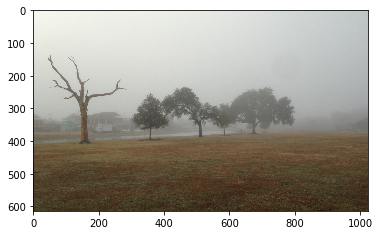

In [43]:
# Verify annotaion data and open the image

os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64/data/train")

filename = train_names_jpg[34][:-4]

check_annotation = []
with open(filename+".txt") as f:
    check_annotation = f.readlines()
print("Number of annotations : ",len(check_annotation))
for i in range(len(check_annotation)):
    print("(",mapping_without_coco_dict[int(check_annotation[i].split(" ",1)[0])],") ",check_annotation[i])

check_annotation_image =str(filename)+ ".jpg"
img = Image.open(check_annotation_image)
imshow(np.asarray(img))

### Load and view val folder's data

In [42]:
# Get all jpg files in train folder
os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64/data/val")
val_names = os.listdir()
val_names_jpg = []
for files in val_names:
    if files.endswith('.jpg'):
        val_names_jpg.append(files)


5
196 0.7770870000000001 0.21504900000000002 0.08898400000000006 0.376512

196 0.8787834999999999 0.19119150000000001 0.105163 0.368705

13 0.8308905 0.2123205 0.19089899999999993 0.379247

51 0.914128 0.35353199999999996 0.03128200000000003 0.03333599999999998

418 0.7906265 0.010021 0.027044999999999986 0.019778



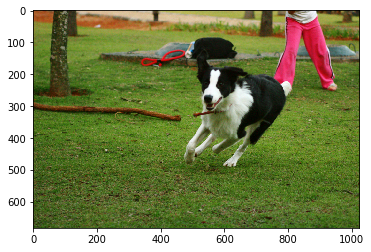

In [43]:
# Verify annotaion data and open the image

os.chdir("E:/Machine Learning/Kaggle - Open Images Challenge/darknet/build/darknet/x64/data/val")

filename = val_names_jpg[4][:-4]

check_annotation = []
with open(filename+".txt") as f:
    check_annotation = f.readlines()
print(len(check_annotation))
for i in range(len(check_annotation)):
    print(check_annotation[i])

check_annotation_image =str(filename)+ ".jpg"
img = Image.open(check_annotation_image)
imshow(np.asarray(img))